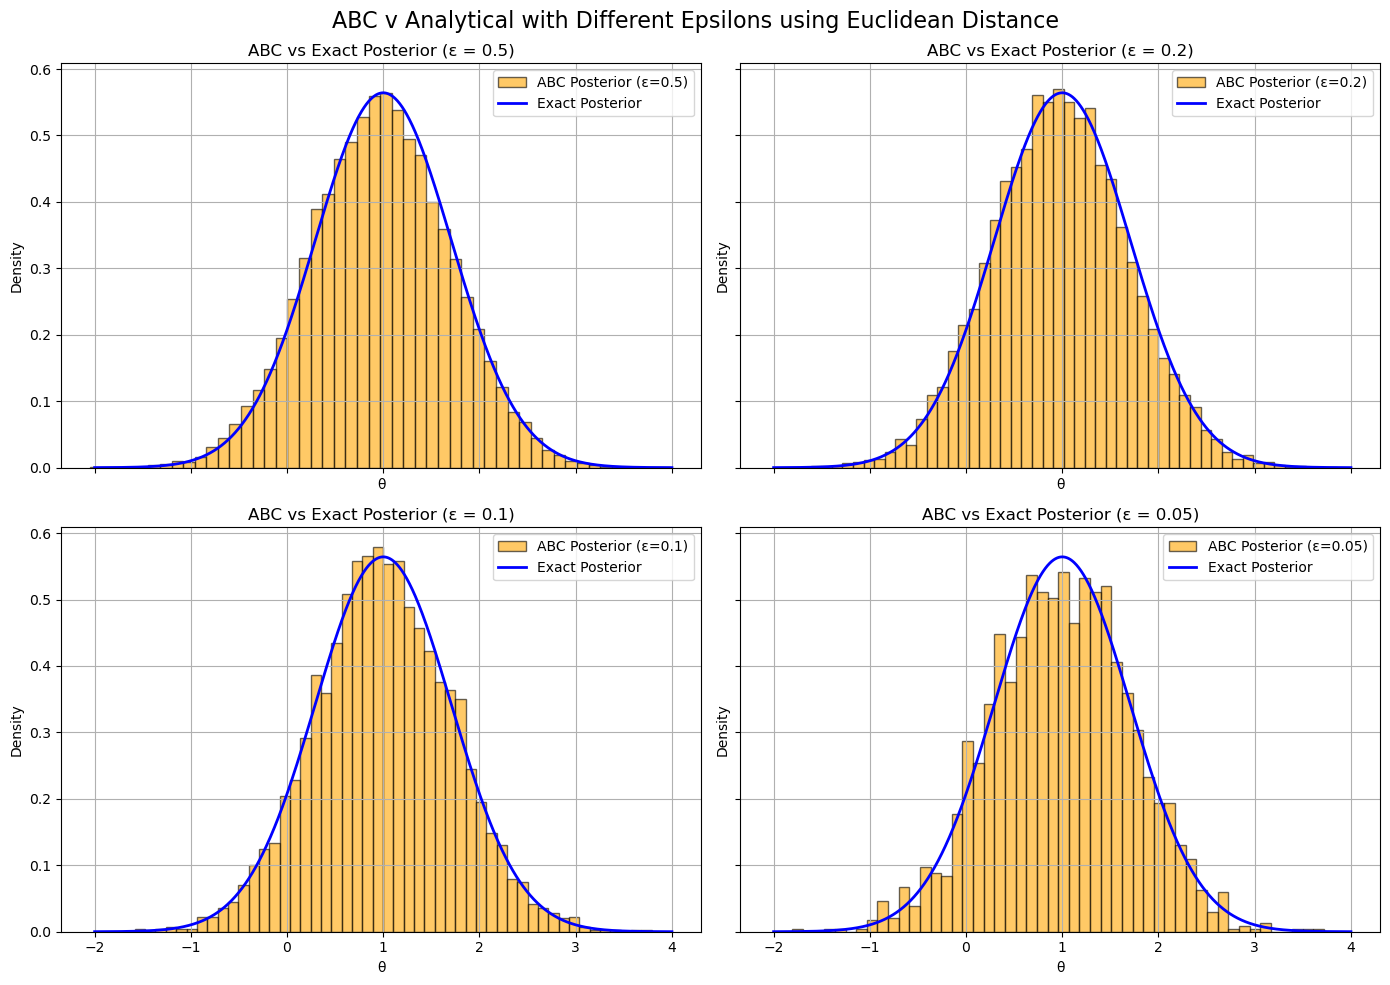

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(42)

# Observed data
x_obs = 2.0

# Prior parameters
mu_prior = 0.0
sigma_prior = 1.0

# Likelihood standard deviation (known)
sigma_likelihood = 1.0

# Exact posterior parameters (conjugate Normal-Normal)
sigma_post = 1 / np.sqrt(1 / sigma_prior**2 + 1 / sigma_likelihood**2)
mu_post = sigma_post**2 * (mu_prior / sigma_prior**2 + x_obs / sigma_likelihood**2)

# Grid for plotting
theta_vals = np.linspace(-2, 4, 1000)
exact_posterior = norm.pdf(theta_vals, loc=mu_post, scale=sigma_post)

# -------------------------------------
# ABC Rejection Sampling Function
# -------------------------------------
def abc_rejection(x_obs, N=100_000, epsilon=0.1):
    theta_samples = []
    for _ in range(N):
        theta_star = np.random.normal(mu_prior, sigma_prior)
        x_star = np.random.normal(theta_star, sigma_likelihood)
        if abs(x_star - x_obs) < epsilon:
            theta_samples.append(theta_star)
    return np.array(theta_samples)

# Epsilon values to test
epsilons = [0.5, 0.2, 0.1, 0.05]
abc_posteriors = {}

# Run ABC for each epsilon
for eps in epsilons:
    samples = abc_rejection(x_obs, N=200_000, epsilon=eps)
    abc_posteriors[eps] = samples

# -------------------------------------
# Plotting
# -------------------------------------
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(14, 10))
axs = axs.flatten()

for i, eps in enumerate(epsilons):
    ax = axs[i]
    samples = abc_posteriors[eps]

    # Plot ABC histogram
    ax.hist(samples, bins=50, density=True, alpha=0.6, color='orange', edgecolor='k', label=f'ABC Posterior (ε={eps})')

    # Overlay exact posterior
    ax.plot(theta_vals, exact_posterior, color='blue', lw=2, label='Exact Posterior')

    ax.set_title(f"ABC vs Exact Posterior (ε = {eps})")
    ax.set_xlabel("θ")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(True)

fig.suptitle("ABC v Analytical with Different Epsilons using Euclidean Distance", fontsize=16)
plt.tight_layout()
plt.savefig("plots/numerical_v_abc.png")
plt.show()